In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
import deepchem as dc
from tqdm import tqdm

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
import sys
sys.path.append('../../code')

from splits import get_nearest_mols

# MolData

In [3]:
# Note: this dataset is too large to be loaded into the repository.
# You can find the dataset in the paper: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-022-00590-y
# Or at the official Zenodo: https://zenodo.org/record/6021605

data = pd.read_csv('../../../Transilico-MolData-7300272/Data/all_molecular_data.csv') 
data

/tmp/ipykernel_1580825/2157940996.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../../Transilico-MolData-7300272/Data/all_molecular_data.csv')


,smiles,PUBCHEM_CID,activity_1554,activity_2732,activity_1085,activity_1236,activity_1274,activity_781,activity_422,activity_1224905,...,activity_743199,activity_743219,activity_743226,activity_743227,activity_743228,activity_743239,activity_743240,activity_743241,activity_743242,split
0,Cc1ccccc1Cn1c(=O)n(-c2ccccc2)c(=O)c2ccc(C(=O)N...,15944820,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
1,CCN(CC)S(=O)(=O)c1csc(C(=O)Nc2ccccn2)c1,648487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
2,COc1ccc(/C=C(\NC(=O)c2ccc(Cl)cc2)C(=O)NCCCN2CC...,2891740,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
3,COc1cccc(OCc2nnc(SCC(=O)N3c4ccccc4Sc4ccc(Cl)cc...,1134840,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
4,O=C(Oc1ccc(N(Cc2cccs2)C2=NS(=O)(=O)c3ccccc32)c...,990838,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429984,CO/N=C1/C[C@]2(C[C@@H]3C[C@@H](C/C=C(\C)C[C@@H...,44134376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
1429985,CO/N=C(/C(=O)OC)c1ccccc1CO/N=C(\C)c1cccc(C(F)(...,11664966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
1429986,CCOP(=O)(OCC)SCS(=O)(=O)C(C)(C)C,14671598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
1429987,CCCC[Sn](CCCC)CCCC,3032732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train


In [4]:
data['activity_1554'].value_counts()

0.0    302757
1.0       516
Name: activity_1554, dtype: int64

In [5]:
data['split'].value_counts()

train         1143981
test           143004
validation     143004
Name: split, dtype: int64

In [6]:
train_smiles = data[data['split'] == 'train']['smiles'][:30000]
test_smiles = data[data['split'] == 'test']['smiles'][:30000]

In [7]:
train_smiles = train_smiles.to_list()
test_smiles = test_smiles.to_list()

In [8]:
nearest_dist, nearest_idx = get_nearest_mols(test_smiles, train_smiles, return_idx=True)

Text(0.5, 1.0, 'The nearest distance between train and test')

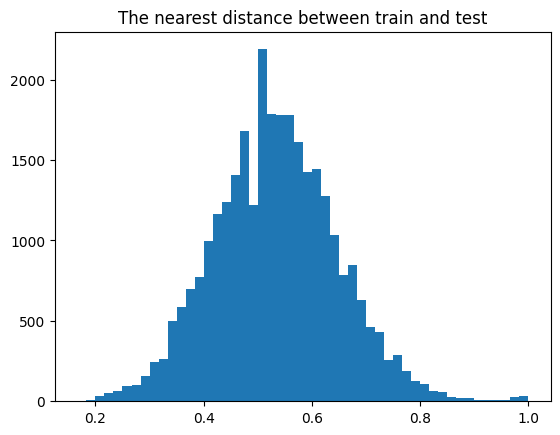

In [9]:
plt.hist(nearest_dist, bins=50)
plt.title('The nearest distance between train and test')

In [10]:
(np.array(nearest_dist) > 0.4).mean()

0.8753

In [11]:
similar_idx = []
for i, sim in enumerate(nearest_dist):
    if sim > 0.99:
        similar_idx.append(i)
similar_idx

[608,
 2294,
 3399,
 3621,
 5247,
 7234,
 7290,
 8210,
 8936,
 8962,
 9658,
 10539,
 10578,
 10964,
 11356,
 12245,
 12664,
 13032,
 13117,
 13341,
 14591,
 15143,
 15195,
 18707,
 21844,
 24095,
 24114,
 24453,
 27774,
 28325,
 29747]

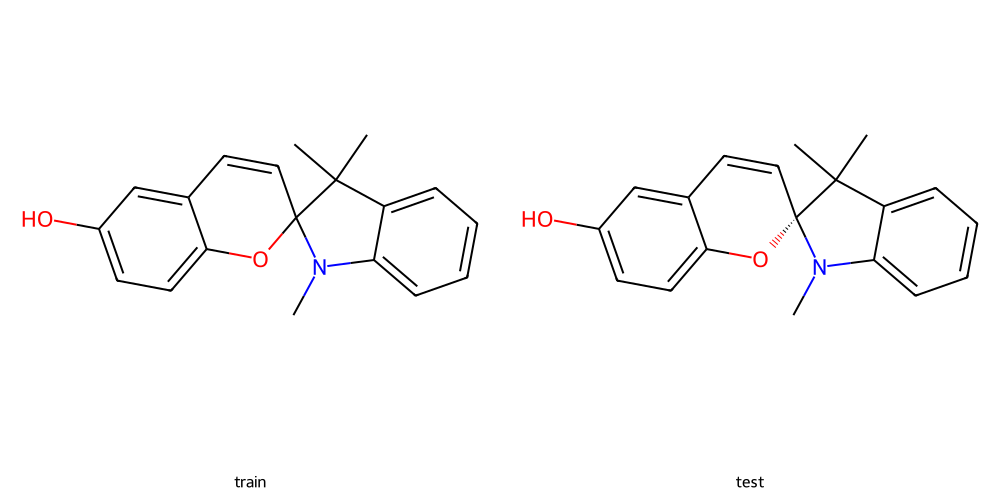

In [12]:
# Looking for the most similar molecules
test_idx = similar_idx[5]
train_idx = nearest_idx[test_idx]

train_similar = train_smiles[train_idx]
test_similar = test_smiles[test_idx]

from rdkit import Chem
from rdkit.Chem import Draw

def draw_molecules(train_smiles, test_smiles):
    # Convert SMILES to RDKit molecule objects
    train_mol = Chem.MolFromSmiles(train_smiles)
    test_mol = Chem.MolFromSmiles(test_smiles)

    # Check if the molecules were created successfully
    if train_mol is None or test_mol is None:
        print("One or both of the provided SMILES strings are invalid.")
        return

    # Create a list of the molecule objects
    mols = [train_mol, test_mol]
    labels = ['train', 'test']

    # Draw the molecules in a 1x2 grid
    img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(500, 500), legends=labels)

    # Display the image
    return img

draw_molecules(train_similar, test_similar)

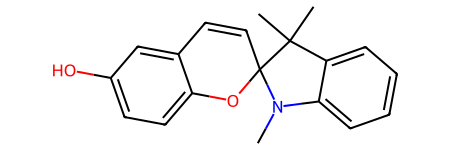

In [13]:
Chem.MolFromSmiles(train_similar)

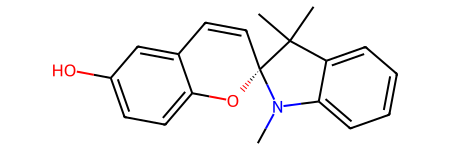

In [14]:
Chem.MolFromSmiles(test_similar)